In [1]:
#@title Importing libraries (double-click to show code)
import os
import pkg_resources
pkg_resources.require("numpy>=`1.20.1")  #  to use specific numpy version
import numpy as np
import rsnapsim as rss
import sys
from sys import platform
from skimage import io ; from skimage.io import imread; from skimage.measure import find_contours
from random import randrange
import pandas as pd
import os; from os import listdir; from os.path import isfile, join
import re # to iterate in files
import glob # to iterate in files
import shutil
import pathlib
from random import randrange
import ipywidgets as widgets ; from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Layout, GridspecLayout 
from IPython.display import Image
import dna_features_viewer
from dna_features_viewer import BiopythonTranslator, GraphicFeature, GraphicRecord, CircularGraphicRecord

# Deffining directories
current_dir = pathlib.Path().absolute()
sequences_dir = current_dir.parents[1].joinpath('DataBases','gene_files')
video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'EmptyFISH')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'EmptyFISH')

rsnaped_dir = current_dir.parents[1].joinpath('rsnaped')

# Importing rSNAPsim_IP
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.grid'] = False

In [75]:
list_files_names = sorted([f for f in listdir(video_dir) if isfile(join(video_dir, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
path_files = [ str(video_dir.joinpath(f).resolve()) for f in list_files_names ] # creating the complete path for each file
num_files = len(path_files)

In [76]:
path_files

['/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI001_XY1620757205_Z00_T0_C0.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI001_XY1620757205_Z00_T0_C1.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI001_XY1620757205_Z00_T0_C2.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI001_XY1620757205_Z00_T0_C3.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI002_XY1620757341_Z00_T0_C0.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI002_XY1620757341_Z00_T0_C1.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI002_XY1620757341_Z00_T0_C2.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI002_XY1620757341_Z00_T0_C3.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI003_XY1620757459_Z00_T0_C0.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI003_XY1620757459_Z00_T0

In [77]:
list_files_names

['ROI001_XY1620757205_Z00_T0_C0.tif',
 'ROI001_XY1620757205_Z00_T0_C1.tif',
 'ROI001_XY1620757205_Z00_T0_C2.tif',
 'ROI001_XY1620757205_Z00_T0_C3.tif',
 'ROI002_XY1620757341_Z00_T0_C0.tif',
 'ROI002_XY1620757341_Z00_T0_C1.tif',
 'ROI002_XY1620757341_Z00_T0_C2.tif',
 'ROI002_XY1620757341_Z00_T0_C3.tif',
 'ROI003_XY1620757459_Z00_T0_C0.tif',
 'ROI003_XY1620757459_Z00_T0_C1.tif',
 'ROI003_XY1620757459_Z00_T0_C2.tif',
 'ROI003_XY1620757459_Z00_T0_C3.tif',
 'ROI004_XY1620757588_Z00_T0_C0.tif',
 'ROI004_XY1620757588_Z00_T0_C1.tif',
 'ROI004_XY1620757588_Z00_T0_C2.tif',
 'ROI004_XY1620757588_Z00_T0_C3.tif',
 'ROI005_XY1620757701_Z00_T0_C0.tif',
 'ROI005_XY1620757701_Z00_T0_C1.tif',
 'ROI005_XY1620757701_Z00_T0_C2.tif',
 'ROI005_XY1620757701_Z00_T0_C3.tif',
 'ROI006_XY1620757885_Z00_T0_C0.tif',
 'ROI006_XY1620757885_Z00_T0_C1.tif',
 'ROI006_XY1620757885_Z00_T0_C2.tif',
 'ROI006_XY1620757885_Z00_T0_C3.tif',
 'ROI007_XY1620758020_Z00_T0_C0.tif',
 'ROI007_XY1620758020_Z00_T0_C1.tif',
 'ROI007_XY1

In [78]:
# This function takes all the videos in the folder and merge those with similar names
list_prefix = [] # list that will store name prefix for every image
ending_string = re.compile('.*_C0.tif')  # detecting files ending in _C0.tif
for root, dirs, files in os.walk(video_dir):
  for file in files:
    if ending_string.match(file):
        prefix = file.rpartition('_')[0]
        print(file)
        list_prefix.append(prefix)

ROI001_XY1620757205_Z00_T0_C0.tif
ROI002_XY1620757341_Z00_T0_C0.tif
ROI003_XY1620757459_Z00_T0_C0.tif
ROI004_XY1620757588_Z00_T0_C0.tif
ROI005_XY1620757701_Z00_T0_C0.tif
ROI006_XY1620757885_Z00_T0_C0.tif
ROI007_XY1620758020_Z00_T0_C0.tif
ROI008_XY1620758163_Z00_T0_C0.tif
ROI009_XY1620758309_Z00_T0_C0.tif
ROI010_XY1620758450_Z00_T0_C0.tif


In [79]:
list_prefix

['ROI001_XY1620757205_Z00_T0',
 'ROI002_XY1620757341_Z00_T0',
 'ROI003_XY1620757459_Z00_T0',
 'ROI004_XY1620757588_Z00_T0',
 'ROI005_XY1620757701_Z00_T0',
 'ROI006_XY1620757885_Z00_T0',
 'ROI007_XY1620758020_Z00_T0',
 'ROI008_XY1620758163_Z00_T0',
 'ROI009_XY1620758309_Z00_T0',
 'ROI010_XY1620758450_Z00_T0']

In [84]:
# This function takes all the videos in the folder and merge those with similar names
list_files_per_image =[]  # list that stores all files belonging to the same image in a sublist
ending_string = re.compile('.*_C0.tif')  # detecting files ending in _C0.tif
for _, _, files in os.walk(video_dir):
  for file in files:
    if ending_string.match(file):
        prefix = file.rpartition('_')[0]  # stores a string with the first part of the file name before the last underscore character in the file name string.
        list_files_per_image.append(glob.glob( str(video_dir.joinpath(prefix)) + '*.tif'))

In [87]:
list_files_per_image[1]

['/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI002_XY1620757341_Z00_T0_C0.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI002_XY1620757341_Z00_T0_C1.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI002_XY1620757341_Z00_T0_C2.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH/ROI002_XY1620757341_Z00_T0_C3.tif']

In [86]:
number_images = len(list_files_per_file)


In [ ]:
#list_images_separated_ch = [imread(f) for f in files]

In [ ]:
merged_image = np.concatenate([ list_images_separated_ch[i][..., np.newaxis] for i,_ in enumerate(list_images_separated_ch)],axis=-1)
merged_image.shape

'/home/luisub/Desktop/rsnaped/DataBases/LargeDataSets/EmptyFISH'

In [90]:
# merging files for single image
test_idx= 1
merged_image = np.concatenate([ imread(list_files_per_image[test_idx][i])[..., np.newaxis] for i,_ in enumerate(list_files_per_image[test_idx])],axis=-1)
merged_image.shape

(23, 928, 624, 4)

In [ ]:
# Storing a list with all merged images

In [91]:
# This function takes all the videos in the folder and merge those with similar names
list_file_names =[]
list_merged_images =[]  # list that stores all files belonging to the same image in a sublist
ending_string = re.compile('.*_C0.tif')  # detecting files ending in _C0.tif
for _, _, files in os.walk(video_dir):
  for file in files:
    if ending_string.match(file):
        prefix = file.rpartition('_')[0]  # stores a string with the first part of the file name before the last underscore character in the file name string.
        list_files_per_image = glob.glob( str(video_dir.joinpath(prefix)) + '*.tif')
        #merged_image = np.concatenate([ imread(list_files_per_image[i])[..., np.newaxis] for i,_ in enumerate(list_files_per_image)],axis=-1)
        list_file_names.append(prefix)
        list_merged_images.append(np.concatenate([ imread(list_files_per_image[i])[..., np.newaxis] for i,_ in enumerate(list_files_per_image)],axis=-1))


['ROI001_XY1620757205_Z00_T0',
 'ROI002_XY1620757341_Z00_T0',
 'ROI003_XY1620757459_Z00_T0',
 'ROI004_XY1620757588_Z00_T0',
 'ROI005_XY1620757701_Z00_T0',
 'ROI006_XY1620757885_Z00_T0',
 'ROI007_XY1620758020_Z00_T0',
 'ROI008_XY1620758163_Z00_T0',
 'ROI009_XY1620758309_Z00_T0',
 'ROI010_XY1620758450_Z00_T0']

In [96]:
def merging_files(directory, substring_to_detect_in_file_name = '.*_C0.tif'):
    # This function takes all the videos in the folder and merge those with similar names
    list_file_names =[]
    list_merged_images =[]  # list that stores all files belonging to the same image in a sublist
    ending_string = re.compile(substring_to_detect_in_file_name)  # detecting files ending in _C0.tif
    for _, _, files in os.walk(directory):
        for file in files:
            if ending_string.match(file):
                prefix = file.rpartition('_')[0]  # stores a string with the first part of the file name before the last underscore character in the file name string.
                list_files_per_image = glob.glob( str(directory.joinpath(prefix)) + '*.tif')
                list_file_names.append(prefix)
                list_merged_images.append(np.concatenate([ imread(list_files_per_image[i])[..., np.newaxis] for i,_ in enumerate(list_files_per_image)],axis=-1))   
    return list_file_names, list_merged_images

In [97]:
list_file_names, list_merged_images = merging_files(video_dir, substring_to_detect_in_file_name = '.*_C0.tif')

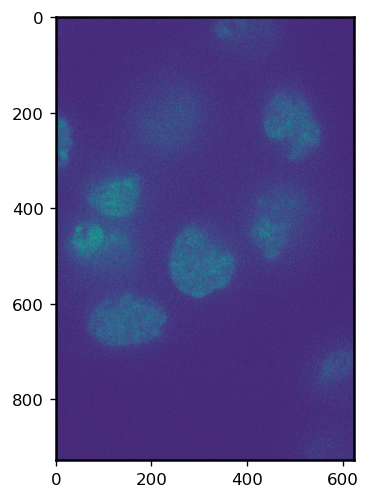

In [99]:
plt.imshow(list_merged_images[0][0,:,:,0])